# Skaters (Season 2024/25) - Relationships between variables

## Step 0: Import libraries

In [1]:
import sys
import os
import pandas as pd

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
from utils import df_utils, distributions_utils, pmf_utils, cdf_utils, modeling_distributions_utils

## Step 1: Import the dataset

In [4]:
#skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
skaters_df = "../data/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


## Step 2: Read the data

In [5]:
df_utils.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [6]:
df_utils.save_column_names(df)

Saved: names_columns.txt


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


## Step 3: Data cleaning

In [8]:
# Missing values?
df_utils.report_nan(df)

No missing values found.


In [9]:
df = df_utils.drop_duplicate_columns(df, ["faceoffsWon", "I_F_faceOffsWon"])
df = df_utils.drop_duplicate_columns(df, [ "penalityMinutes", "I_F_penalityMinutes"])

Dropped columns: ['I_F_faceOffsWon']
Number of features: 153
Dropped columns: ['I_F_penalityMinutes']
Number of features: 152


## Step 4: Variables and Filter

In [10]:
feature1="I_F_goals"
feature2="I_F_xGoals"
situation = "all"
min_games_played = 20

In [11]:
df_goals = df[(df["situation"]==situation) & (df["games_played"]>=min_games_played)]

## Step 5

### Scatter plots

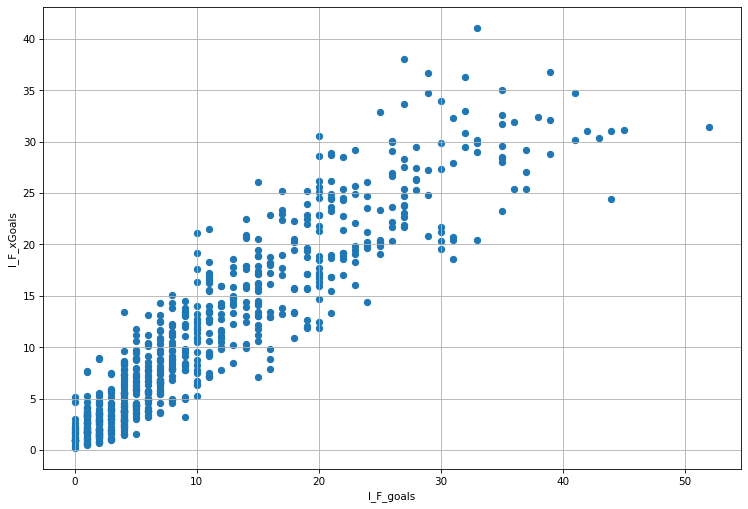

In [13]:
correlations_utils.plot_scatter(df_goals[feature1], df_goals[feature2], xlabel=feature1, ylabel=feature2)

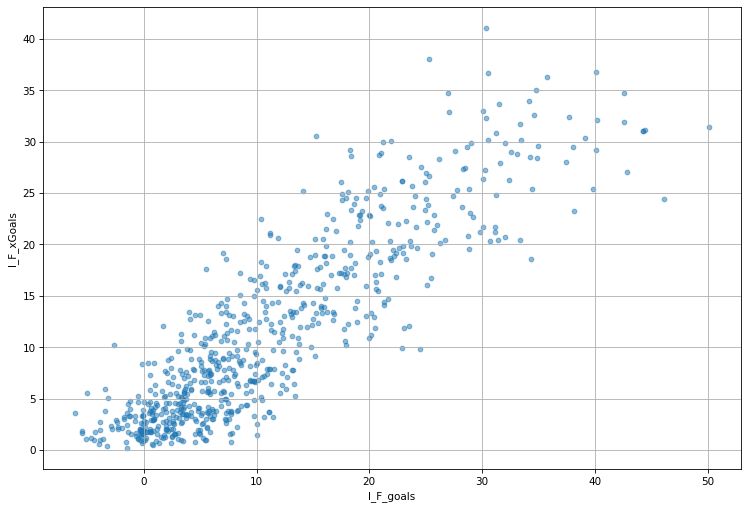

In [14]:
correlations_utils.plot_scatter_with_jitter(df_goals[feature1], df_goals[feature2], xlabel=feature1, ylabel=feature2, alpha=0.5)

### Decile plots

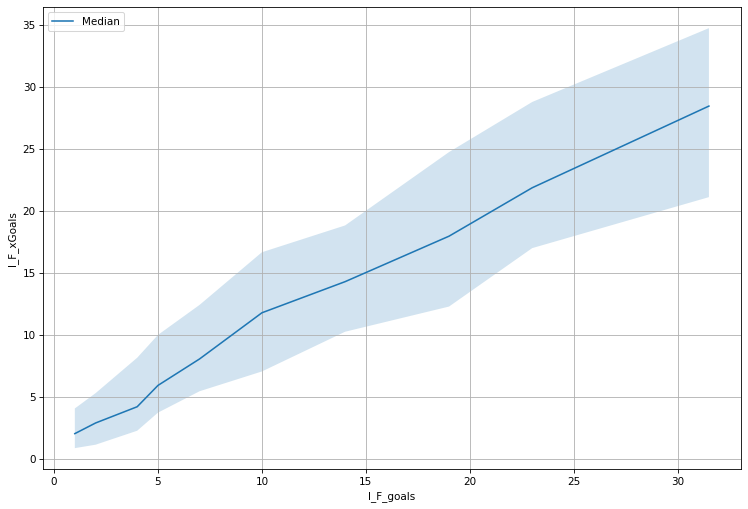

In [28]:
correlations_utils.plot_decile(df_goals, feature1, feature2, xlabel=feature1, ylabel=feature2)

### Standardization and Pearson Correlation Coefficient 

Pearson correlation coefficient: 0.921


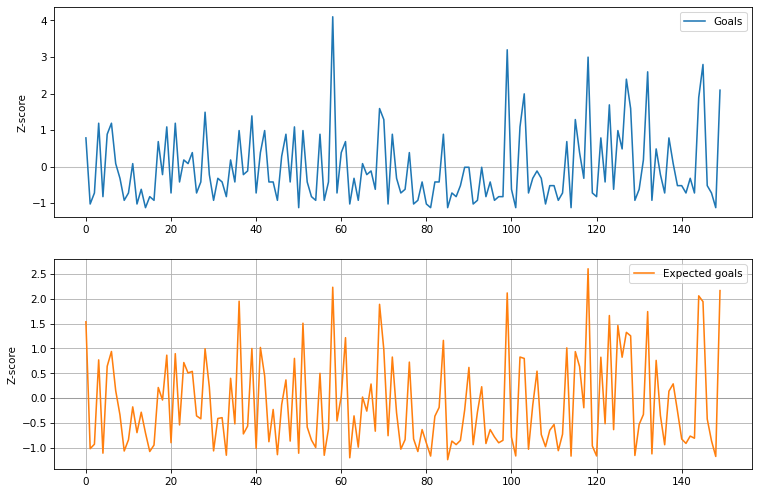

In [73]:
correlations_utils.plot_zscore_and_corr(df_goals[feature1], df_goals[feature2], 
                                        end_sample=150, 
                                        label1="Goals", 
                                        label2="Expected goals")

### Rank Correlation and Spearman's Rank Correlation Coefficient

Spearman's rank correlation coefficient: 0.930


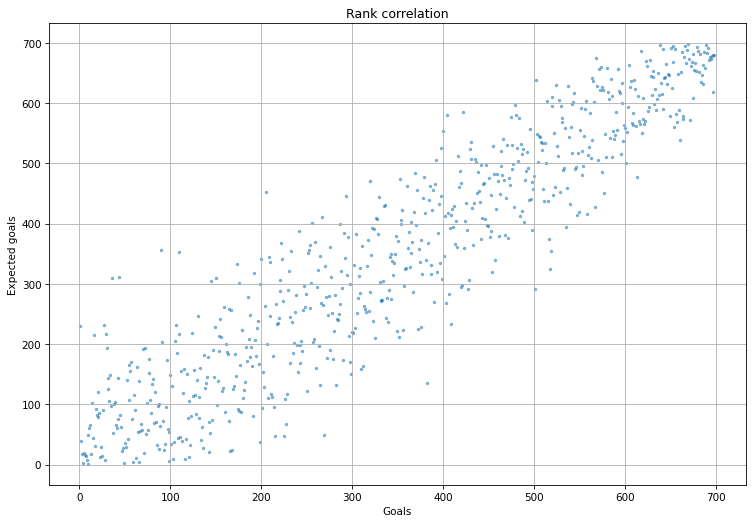

In [75]:
correlations_utils.plot_rank_correlation(df_goals[feature1], df_goals[feature2], xlabel="Goals", ylabel="Expected goals")